# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 7
label_name = "stat8"
layers = [n, 2]

epochs = 2000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 43.74608254432678
Epoch 1, Loss 43.532089948654175
Epoch 2, Loss 42.985144317150116
Epoch 3, Loss 42.958883821964264
Epoch 4, Loss 42.71230846643448
Epoch 5, Loss 42.04951551556587
Epoch 6, Loss 42.941161155700684
Epoch 7, Loss 42.43376100063324
Epoch 8, Loss 41.9434831738472
Epoch 9, Loss 41.842013478279114
Epoch 10, Loss 41.43991529941559
Epoch 11, Loss 41.52720773220062
Epoch 12, Loss 41.07176089286804
Epoch 13, Loss 40.47786325216293
Epoch 14, Loss 39.603855550289154
Epoch 15, Loss 39.30634042620659
Epoch 16, Loss 39.023661494255066
Epoch 17, Loss 38.57418563961983
Epoch 18, Loss 37.82634311914444
Epoch 19, Loss 37.211154729127884
Epoch 20, Loss 36.91578632593155
Epoch 21, Loss 35.788402050733566
Epoch 22, Loss 35.28648215532303
Epoch 23, Loss 34.6578224003315
Epoch 24, Loss 33.76129034161568
Epoch 25, Loss 32.54317796230316
Epoch 26, Loss 31.805007219314575
Epoch 27, Loss 31.983641505241394
Epoch 28, Loss 31.34472957253456
Epoch 29, Loss 31.258774757385254
Epoch 30, 

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

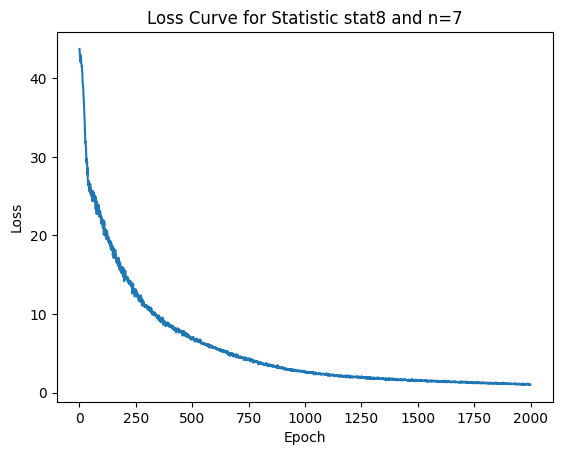

<Figure size 640x480 with 0 Axes>

In [5]:
# Plot loss function
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Loss Curve for Statistic {label_name} and n={n}")
plt.show()
plt.savefig(f"figures/loss_curve_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 99.26814393169343%
Accuracy for class 1 = 90.9090909090909%
Overall accuracy = 99.06746031746032%


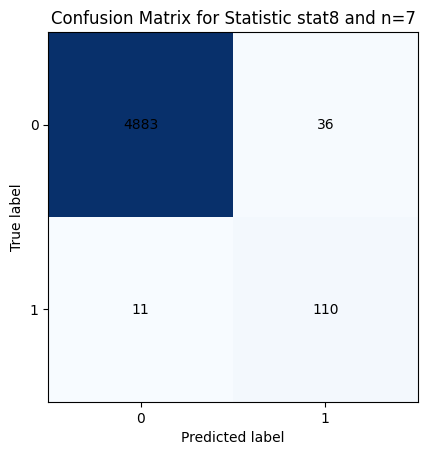

In [6]:
confusion_matrix = evaluate_model(model, full_dataset)
confusion_matrix.print_accuracy()
confusion_matrix.plot(title=f"Confusion Matrix for Statistic {label_name} and n={n}")

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

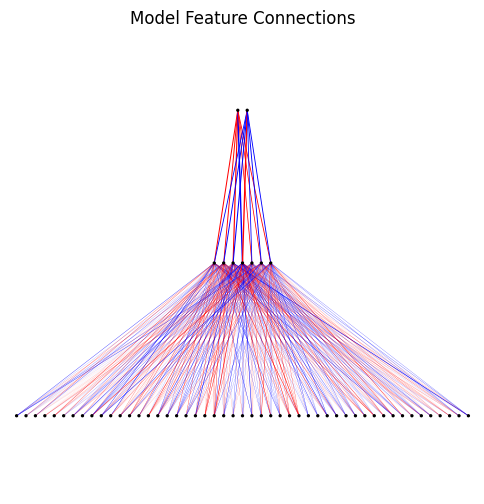

Layer 1


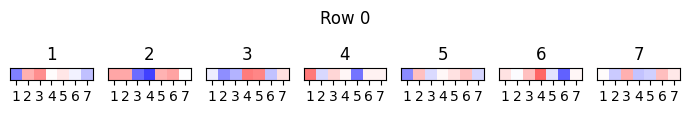

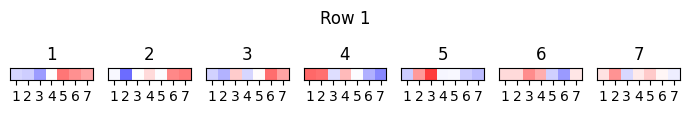

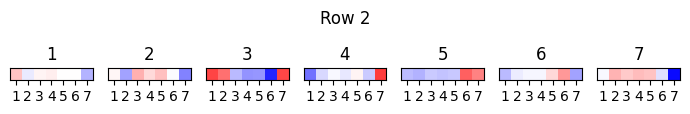

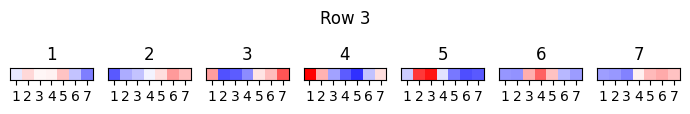

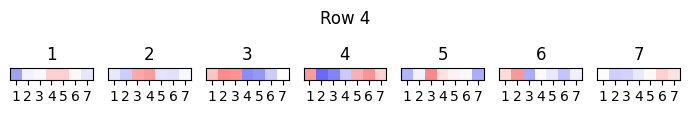

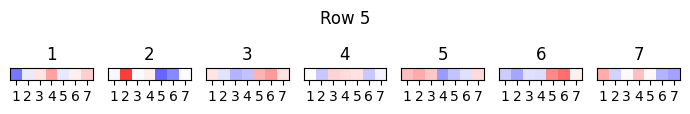

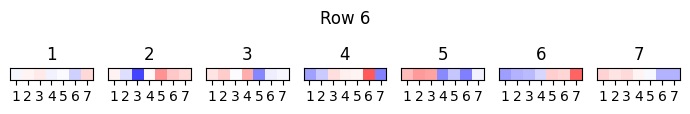

Layer 2


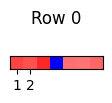

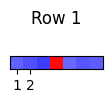

In [7]:
model.plot_connections()

for i in range(len(layers)):
    print(f"Layer {i + 1}")
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)